In [5]:
import numpy as np
import pandas as pd

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples

In [8]:
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('/content/Test (2).csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [11]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,50
Age,0
Graduated,24
Profession,38
Work_Experience,269
Spending_Score,0
Family_Size,113
Var_1,32


In [12]:
dataset = df.copy()
dataset.drop('ID', axis=1, inplace=True)
dataset.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [13]:
dataset['Profession'].unique()

array(['Engineer', 'Healthcare', nan, 'Executive', 'Marketing', 'Doctor',
       'Artist', 'Lawyer', 'Entertainment', 'Homemaker'], dtype=object)

In [14]:
dataset['Spending_Score'].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [15]:
dataset['Var_1'].unique()

array(['Cat_6', 'Cat_4', 'Cat_3', nan, 'Cat_1', 'Cat_2', 'Cat_5', 'Cat_7'],
      dtype=object)

In [16]:
dataset.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [17]:
dataset.isnull().sum()

,0
Gender,0
Ever_Married,50
Age,0
Graduated,24
Profession,38
Work_Experience,269
Spending_Score,0
Family_Size,113
Var_1,32


In [19]:
columns_to_fill = ['Profession',
                   'Var_1',
                   'Segmentation',
                   'Spending_Score',
                   'Work_Experience',
                   'Family_Size',
                   'Ever_Married',
                   'Graduated'
                  ]



In [21]:
columns_to_fill = ['Profession',
                   'Var_1',
                   # 'Segmentation',  # Remove or correct this column name if it's not in the DataFrame
                   'Spending_Score',
                   'Work_Experience',
                   'Family_Size',
                   'Ever_Married',
                   'Graduated'
                  ]

for column in columns_to_fill:
    mode_value = dataset[column].mode()[0]
    dataset[column].fillna(mode_value, inplace=True)

In [22]:
dataset.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


In [23]:
le = LabelEncoder()

for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset.loc[:, col] = le.fit_transform(dataset[col].astype(str))

In [24]:
dataset.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0.0,2,1.0,5
1,1,1,37,1,5,8.0,0,4.0,5
2,0,1,69,0,0,0.0,2,1.0,5
3,1,1,59,0,4,11.0,1,2.0,5
4,0,0,19,0,8,1.0,2,4.0,5


In [26]:
# Check if 'Segmentation' column exists before accessing it
if 'Segmentation' in dataset.columns:
    y = dataset['Segmentation']
    X = dataset.drop(columns=['Segmentation'])

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
else:
    print("Error: 'Segmentation' column not found in the dataset.")
    # Handle the error appropriately, e.g., exit the script,
    # load a different dataset, or create a dummy 'Segmentation' column

Error: 'Segmentation' column not found in the dataset.


In [28]:
# Check if 'Segmentation' column exists before accessing it
if 'Segmentation' in dataset.columns:
    y = dataset['Segmentation']
    X = dataset.drop(columns=['Segmentation'])

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
else:
    print("Error: 'Segmentation' column not found in the dataset.")
    # Handle the error appropriately, e.g., exit the script,
    # load a different dataset, or create a dummy 'Segmentation' column

    # Create dummy X and y to avoid the NameError
    X = dataset  # Or select relevant features if 'Segmentation' is not the target
    y = pd.Series(np.zeros(len(dataset)))  # Or any appropriate dummy target

# Now you can safely use X and y in train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Error: 'Segmentation' column not found in the dataset.


In [29]:
y

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2622,0.0
2623,0.0
2624,0.0
2625,0.0


In [30]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0.0,2,1.0,5
1,1,1,37,1,5,8.0,0,4.0,5
2,0,1,69,0,0,0.0,2,1.0,5
3,1,1,59,0,4,11.0,1,2.0,5
4,0,0,19,0,8,1.0,2,4.0,5
...,...,...,...,...,...,...,...,...,...
2622,1,0,29,0,5,9.0,2,4.0,5
2623,0,0,35,1,1,1.0,2,1.0,5
2624,0,0,53,1,3,1.0,2,2.0,5
2625,1,1,47,1,4,1.0,1,5.0,3


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [43]:
inertia = []

# Compute inertia for different numbers of clusters
for n_clusters in range(1, 10):
    kmeans = KMeans(
        n_clusters=n_clusters,
        init= 'k-means++',
        n_init= 'auto',
        random_state= 42
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

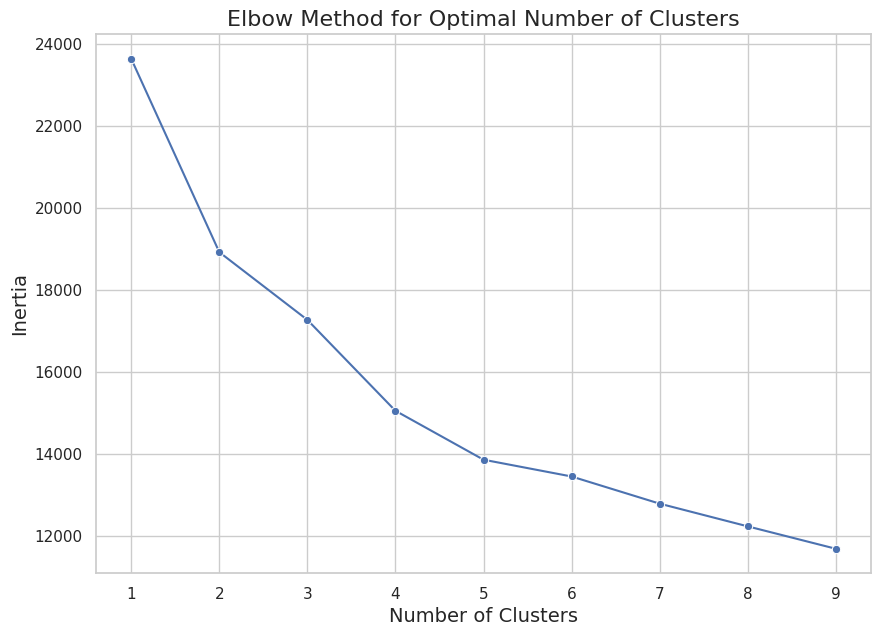

In [44]:
sns.set(style= "whitegrid")
plt.figure(figsize= (10, 7))
sns.lineplot(x= range(1, 10), y= inertia, marker= 'o', linestyle= '-', color= 'b')
plt.xlabel('Number of Clusters', fontsize= 14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize= 16)
plt.xticks(np.arange(1, 10, 1))
plt.show()

In [45]:
silhouette_scores = []

# Compute silhouette scores for different numbers of clusters
for n_clusters in range(2, 10):
    agglomerative = AgglomerativeClustering(n_clusters= n_clusters)
    cluster_labels = agglomerative.fit_predict(X_scaled)

    # Calculate silhouette score
    if len(set(cluster_labels)) > 1:
        score = silhouette_score(X_scaled, cluster_labels)
    else:
        score = -1

    silhouette_scores.append(score)

# Output silhouette scores
for n_clusters, score in zip(range(2, 10), silhouette_scores):
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {score:.4f}')

Number of clusters: 2, Silhouette Score: 0.1945
Number of clusters: 3, Silhouette Score: 0.1624
Number of clusters: 4, Silhouette Score: 0.1648
Number of clusters: 5, Silhouette Score: 0.1667
Number of clusters: 6, Silhouette Score: 0.1640
Number of clusters: 7, Silhouette Score: 0.1532
Number of clusters: 8, Silhouette Score: 0.1525
Number of clusters: 9, Silhouette Score: 0.1506


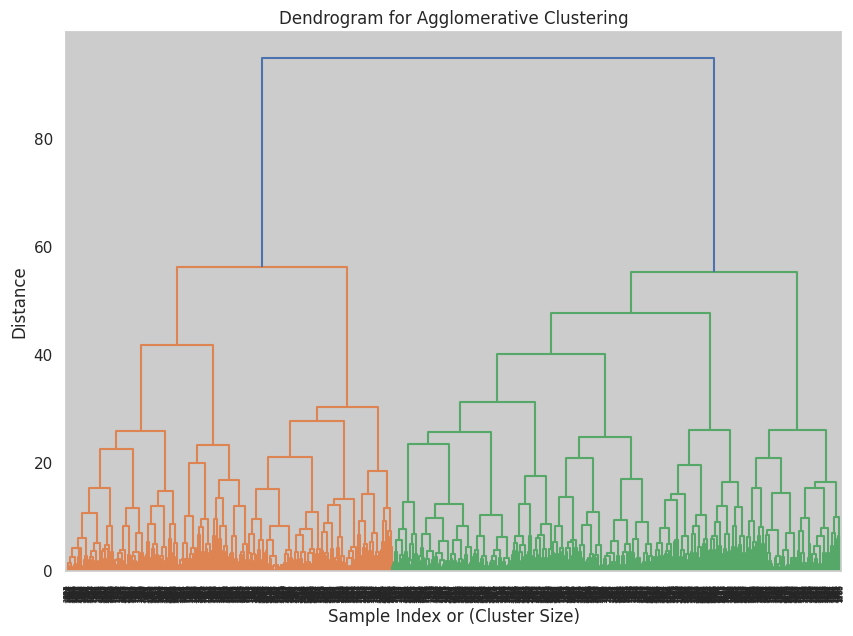

In [46]:
linked = linkage(X_scaled, method= 'ward')

# Plot the dendrogram
plt.figure(figsize= (10, 7))
dendrogram(linked,
           orientation= 'top',
           distance_sort= 'descending',
           show_leaf_counts= True)
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()

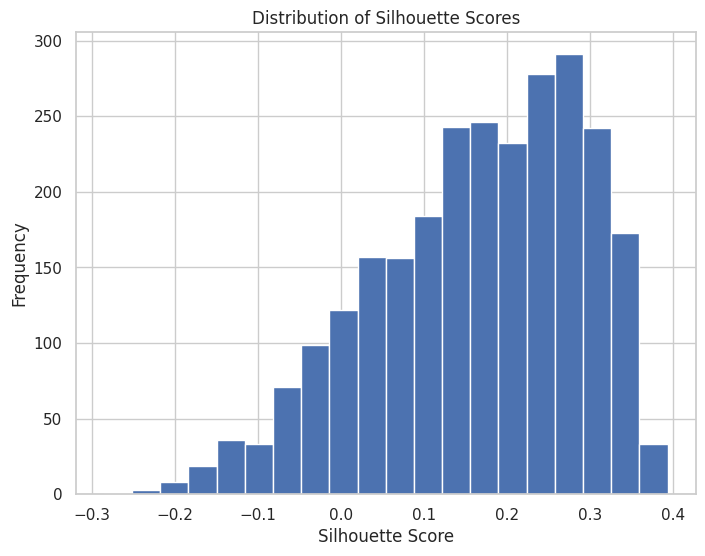

In [47]:
optimal_clusters = 4  # Example: Choose the optimal number of clusters
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters)
cluster_labels = agglomerative.fit_predict(X_scaled)
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

plt.figure(figsize= (8, 6))
plt.hist(silhouette_vals, bins= 20)
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.title('Distribution of Silhouette Scores')
plt.show()